# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "22063614"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [3]:
from astroML.datasets import generate_mu_z

In [4]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

*Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.*

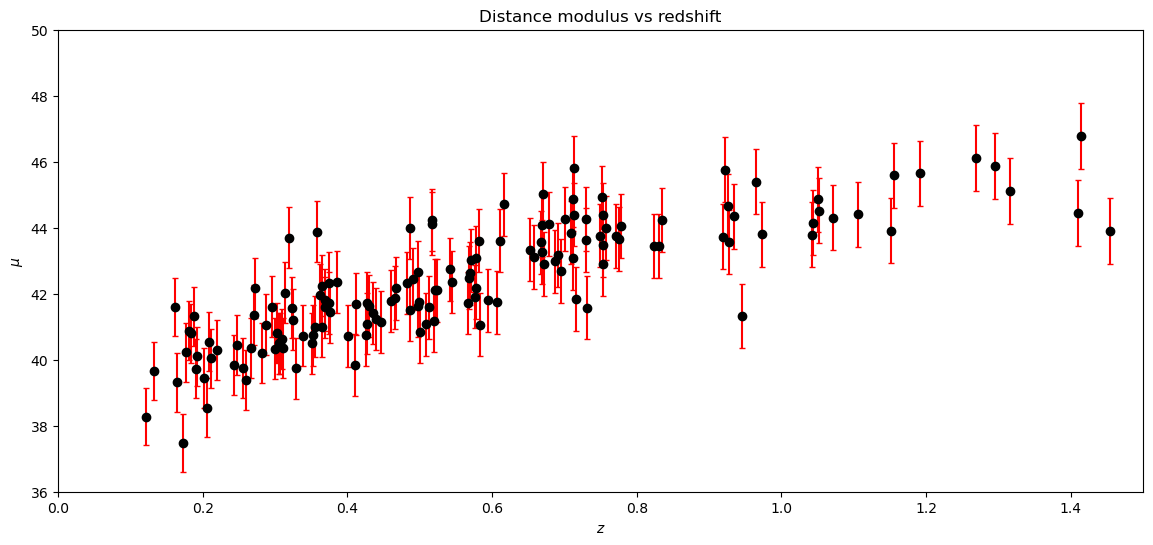

In [5]:
# Plot data
def plot_dist_mod():
    plt.figure(figsize=(14, 6), dpi=100)
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt='o', ecolor='r', color='k', capsize=2)
    plt.xlabel('$z$')
    plt.ylabel('$\mu$')
    plt.title('Distance modulus vs redshift')
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)
plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

*Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):*

We have
$$ C\left ( \theta  \right ) =\left ( X\theta - y \right ) ^{\rm T} \left (  X\theta - y \right )=\left ( \theta ^{\rm T}X^{\rm T}-y^{\rm T} \right )\left (  X\theta - y \right ) $$
Then
$$ C\left ( \theta  \right ) =  \theta^{\rm T}X^{\rm T}X\theta-\theta^{\rm T}X^{\rm T}y-y^{\rm T}X\theta+y^{\rm T}y $$
Drop terms without 𝜃
$$ C\left ( \theta  \right ) =  \theta^{\rm T}X^{\rm T}X\theta-\theta^{\rm T}X^{\rm T}y-y^{\rm T}X\theta $$

*Set the derivative to zero and solve for $\theta$ (use latex mathematics expressions):*

The derivative is:
$$ \frac{\partial C(\theta)}{\partial \theta} =2X^{\rm T}X\theta-X^{\rm T}y-X^{\rm T}y=2X^{\rm T}X\theta-2X^{\rm T}y=0 $$
Thus
$$ X^{\rm T}X\theta=X^{\rm T}y $$
$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y $$

*Solve for $\theta$ by numerically implementing the analytic solution given above.*

In [6]:
def compute_theta_lin_reg(X, y):
    # Add intercept term
    X_mat = np.insert(np.asmatrix(X).T, 0, values=1, axis=1)
    theta = (np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ y).A[0]
    return theta

In [7]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print("Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(theta_c, theta_m))

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [8]:
check_var_defined('theta_c')
check_var_defined('theta_m')

theta_c defined.
theta_m defined.


*Write a method to make a prediction for a given redshift.*

In [9]:
def predict_lin_reg(theta, x):
    x_mat = np.insert(np.asmatrix(x).T, 0, values=1, axis=1)
    y = (theta @ x_mat.T).A[0]
    return y

*Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.*

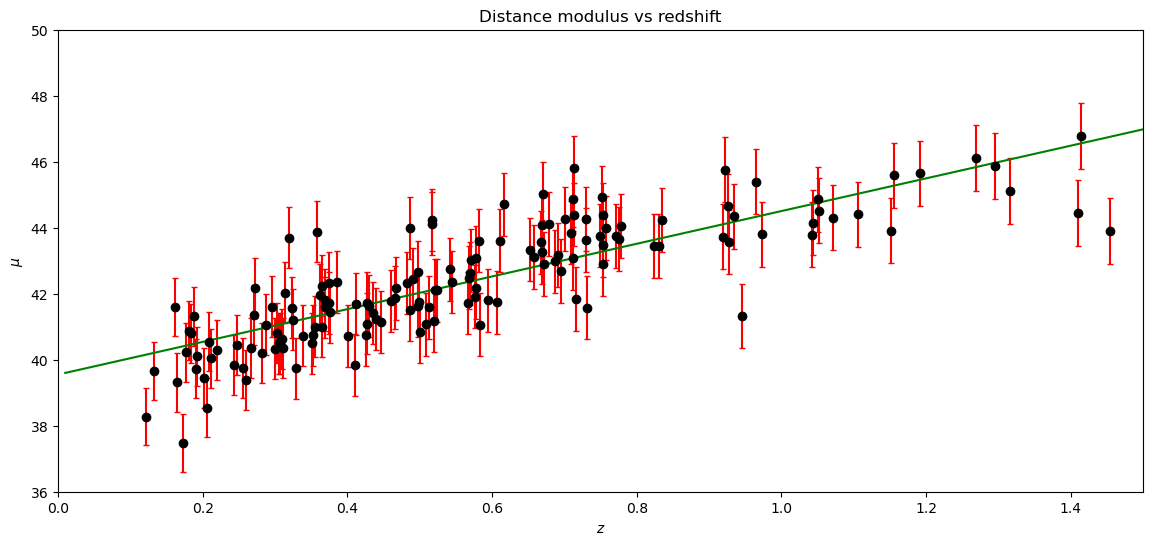

In [10]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
mu_pred_lin = predict_lin_reg(theta, z)
plt.plot(z, mu_pred_lin, 'g-')
plt.show()

In [11]:
check_var_defined('mu_pred_lin')
assert mu_pred_lin.shape == (len(z),), "Make sure the shape of your predictions is correct"

mu_pred_lin defined.


*Solve for the parameters $\theta$ using Scikit-Learn.*

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
z_mat = np.mat(z_sample).T.A
lin_reg.fit(z_mat, mu_sample)

LinearRegression()

In [13]:
print("Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}"
      .format(lin_reg.intercept_, lin_reg.coef_[0]))

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


*Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.*

In [14]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures
def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    poly_features = PolynomialFeatures(degree = degree, include_bias = bias, interaction_only = False)
    z_sample_poly = poly_features.fit_transform(z_mat)
    return z_sample_poly, poly_features
z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly, mu_sample)

LinearRegression()

In [15]:
check_var_defined('lin_reg_poly')

lin_reg_poly defined.


*Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.*

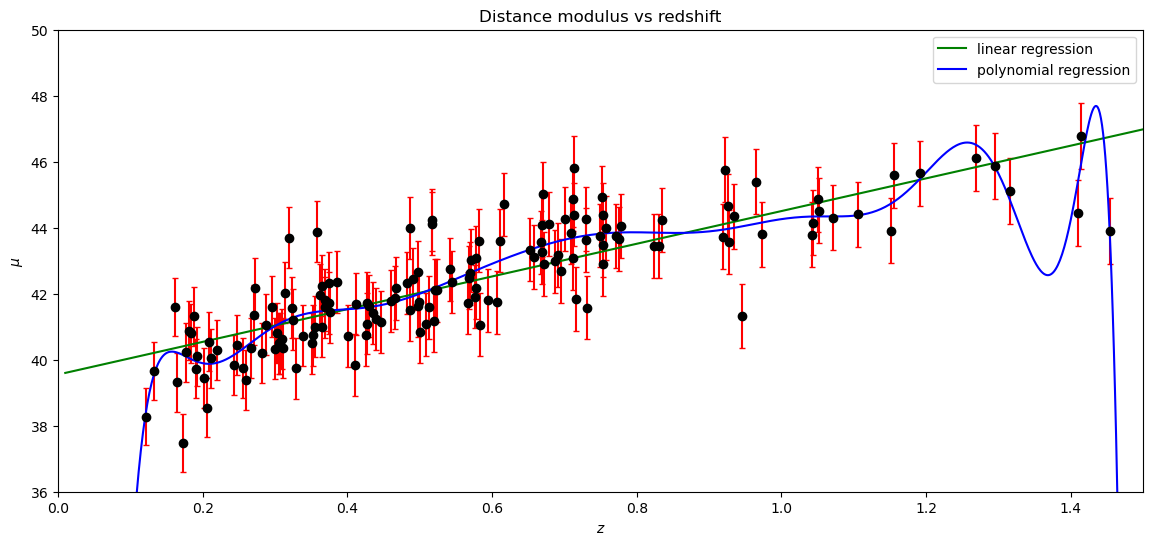

In [16]:
plot_dist_mod()
mu_pred_lin = predict_lin_reg(theta, z)
z_poly = poly_features.transform(np.mat(z).T.A)
mu_pred_poly = lin_reg_poly.predict(z_poly)
plt.plot(z, mu_pred_lin, 'g-', label='linear regression')
plt.plot(z, mu_pred_poly, 'b-', label='polynomial regression')
plt.legend()
plt.show()

In [17]:
check_var_defined('mu_pred_poly')
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


*Comment on the accuracy of your models.*

Neither model is very accurate. The model of linear regression use only the intercept and slope to predict mu, which is underfitted shown in the plot above. By contrast, the model of polynomial regression with degree 15 is overfitted where the predicted values drop suddenly at the beginning and end.

*Improve your polynomial model and use the improved model to make predictions. Call the variable used to store the polynomial model `ridge_reg_poly`. Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.*

In [18]:
# Set the degree of polynomial model as 4.
degree_imp = 4
bias_imp = False
z_sample_imp, poly_features_imp = compute_poly_features(degree_imp, bias_imp)
ridge_reg_poly = LinearRegression()
ridge_reg_poly.fit(z_sample_imp, mu_sample)
z_poly_imp = poly_features_imp.transform(np.mat(z).T.A)
mu_pred_poly_improved = ridge_reg_poly.predict(z_poly_imp)

In [19]:
check_var_defined('ridge_reg_poly')
check_var_defined('mu_pred_poly_improved')
assert mu_pred_poly_improved.shape == (len(z),), "Make sure the shape of your predictions is correct"

ridge_reg_poly defined.
mu_pred_poly_improved defined.


*Plot the predictions made with new model and all previous models considered.*

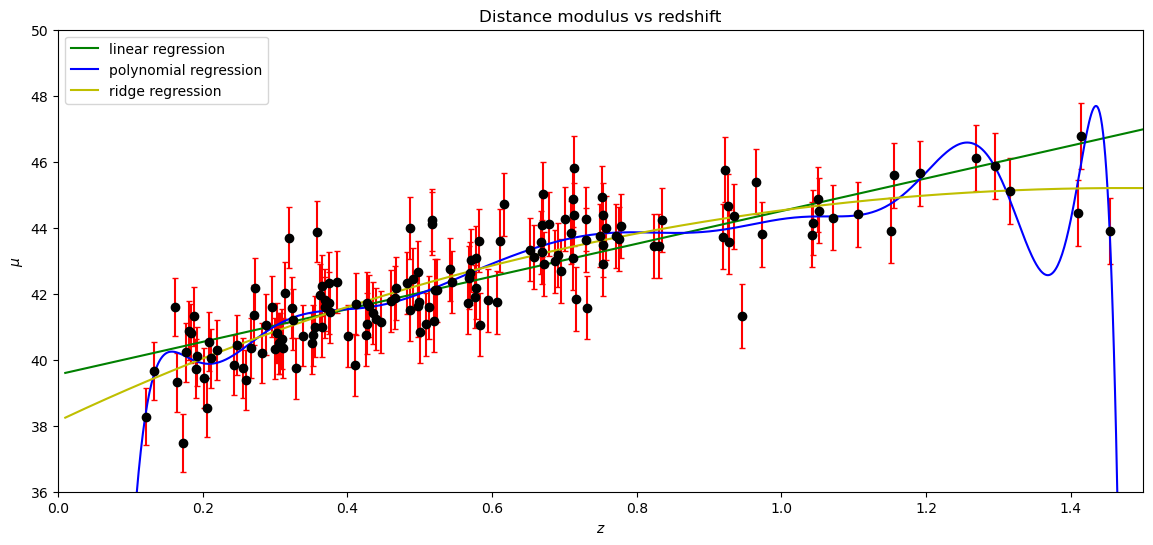

In [20]:
plot_dist_mod()
mu_pred_lin = predict_lin_reg(theta, z)
z_poly = poly_features.transform(np.mat(z).T.A)
mu_pred_poly = lin_reg_poly.predict(z_poly)
plt.plot(z, mu_pred_lin, 'g-', label='linear regression')
plt.plot(z, mu_pred_poly, 'b-', label='polynomial regression')
plt.plot(z, mu_pred_poly_improved, 'y-', label='ridge regression')
plt.legend()
plt.show()

*Compute the RMS error between your predictions and the* data samples*.*

In [21]:
# Define a general function to compute the RMS error
def compute_rms(mu_1, mu_2):
    rms = np.sqrt(np.sum((mu_1-mu_2)**2)/len(mu_2))
    return rms

In [22]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [23]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
mu_pred_lin1 = predict_lin_reg(theta, z_sample)
rms_sample_lin = compute_rms(mu_pred_lin1, mu_sample)

mu_pred_poly1 = lin_reg_poly.predict(poly_features.transform(z_mat))
rms_sample_poly = compute_rms(mu_pred_poly1, mu_sample)

mu_pred_poly_improved1 = ridge_reg_poly.predict(poly_features_imp.transform(z_mat))
rms_sample_poly_improved = compute_rms(mu_pred_poly_improved1, mu_sample)

In [24]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9330


In [25]:
check_var_defined('rms_sample_lin')

rms_sample_lin defined.


In [26]:
check_var_defined('rms_sample_poly')

rms_sample_poly defined.


In [27]:
check_var_defined('rms_sample_poly_improved')

rms_sample_poly_improved defined.


*Comment on what models you believe are best.*

As mentioned before, the model of linear regression which can be treated as polynomial regression with degree 2 is underfitted and polynomial regression with degree 15 is overfitted. In this case, the model of polynomial regression with degree 4 would be the best, and its RMSE is exactly between the other two models, which means it does not overfit or underfit as much as others.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [28]:
from astroML.cosmology import Cosmology
cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


*Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.*

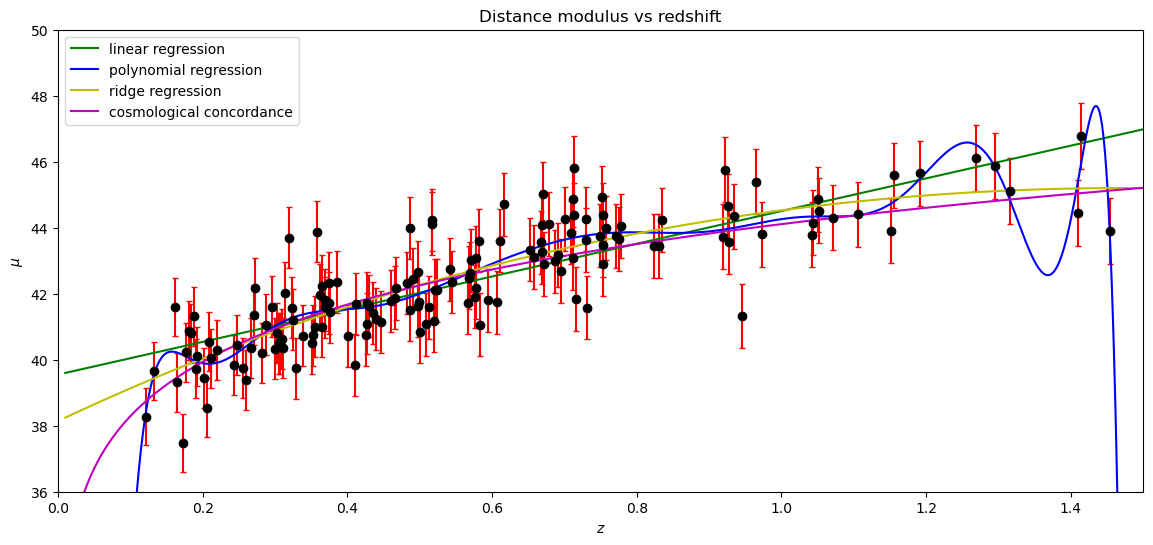

In [29]:
plot_dist_mod()
plt.plot(z, mu_pred_lin, 'g-', label='linear regression')
plt.plot(z, mu_pred_poly, 'b-', label='polynomial regression')
plt.plot(z, mu_pred_poly_improved, 'y-', label='ridge regression')
plt.plot(z, mu_cosmo, 'm-', label='cosmological concordance')
plt.legend()
plt.show()

*Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.*

In [30]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
rms_cosmo_lin = compute_rms(mu_pred_lin, mu_cosmo)
rms_cosmo_poly = compute_rms(mu_pred_poly, mu_cosmo)
rms_cosmo_poly_improved = compute_rms(mu_pred_poly_improved, mu_cosmo)

In [31]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6648
rms_cosmo_poly_improved = 0.6494


In [32]:
check_var_defined('rms_cosmo_lin')

rms_cosmo_lin defined.


In [33]:
check_var_defined('rms_cosmo_poly')

rms_cosmo_poly defined.


In [34]:
check_var_defined('rms_cosmo_poly_improved')

rms_cosmo_poly_improved defined.


*Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.*

The model of polynomial regression with degree 4 has the lowest RMS compared with the exact model, which means it has the highest accuracy, where the model of polynomial regression with degree 15 has the largest RMS and lowest accuracy. Therefore, combined with the previous conclusion, when we choose models we should know that low RMS values in the train set mean overfitted and high RMS values mean underfitted and models in both situations lose accuracy. And the RMS values of the best model in the train set will converge to a non-zero value.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [35]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined
X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

*Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.*

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [36]:
import pandas as pd
cols=['u-g', 'g-r', 'r-i', 'i-z']
X_pd = pd.DataFrame(X, columns = cols)

In [37]:
check_var_defined('X_pd')
X_pd.head()

X_pd defined.


,u-g,g-r,r-i,i-z
0,1.250999,0.394000,0.137000,0.061999
1,1.048000,0.339001,0.151999,0.023001
2,1.008001,0.341999,0.129000,0.203001
3,0.965000,0.392000,0.149000,0.150000
4,1.040001,0.333000,0.125999,0.101999


In [38]:
y_pd = pd.Series(y, dtype=int)

In [39]:
check_var_defined('y_pd')
y_pd.head()

y_pd defined.


0    0
1    0
2    0
3    0
4    0
dtype: int32

*Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.*

In [40]:
y_pd.name = 'target'
X_pd_all = pd.concat([X_pd, y_pd], axis = 1)

In [41]:
check_var_defined('X_pd_all')
X_pd_all.head()

X_pd_all defined.


,u-g,g-r,r-i,i-z,target
0,1.250999,0.394000,0.137000,0.061999,0
1,1.048000,0.339001,0.151999,0.023001,0
2,1.008001,0.341999,0.129000,0.203001,0
3,0.965000,0.392000,0.149000,0.150000,0
4,1.040001,0.333000,0.125999,0.101999,0


*Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.*

In [42]:
pd_fields = pd.Series(['Background', 'RR Lyrae'], name = 'target description')
X_pd_all = pd.merge(X_pd_all, pd_fields, left_on = 'target', right_index = True)

In [43]:
X_pd_all.head()
X_pd_all.tail()

,u-g,g-r,r-i,i-z,target,target description
93136,0.962999,0.059000,-0.025999,-0.025000,1,RR Lyrae
93137,1.059999,0.185001,0.050999,-0.023998,1,RR Lyrae
93138,1.044001,0.212000,0.035000,0.002001,1,RR Lyrae
93139,1.064999,0.172001,0.042000,0.003000,1,RR Lyrae
93140,1.125999,0.065001,-0.017000,-0.057999,1,RR Lyrae


*How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?*

In [44]:
n_rrlyrae = len(y[y == 1])

In [45]:
check_var_defined('n_rrlyrae')
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


*How many background stars are there in the dataset (i.e. compute `n_background`)?*

In [46]:
n_background = len(y[y == 0])

In [47]:
check_var_defined('n_background')
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


*Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type. Make sure the distribution plots are normalised to have an area of 1 under the curve for each of the classes.*

In [48]:
%matplotlib inline
import seaborn as sns; sns.set()

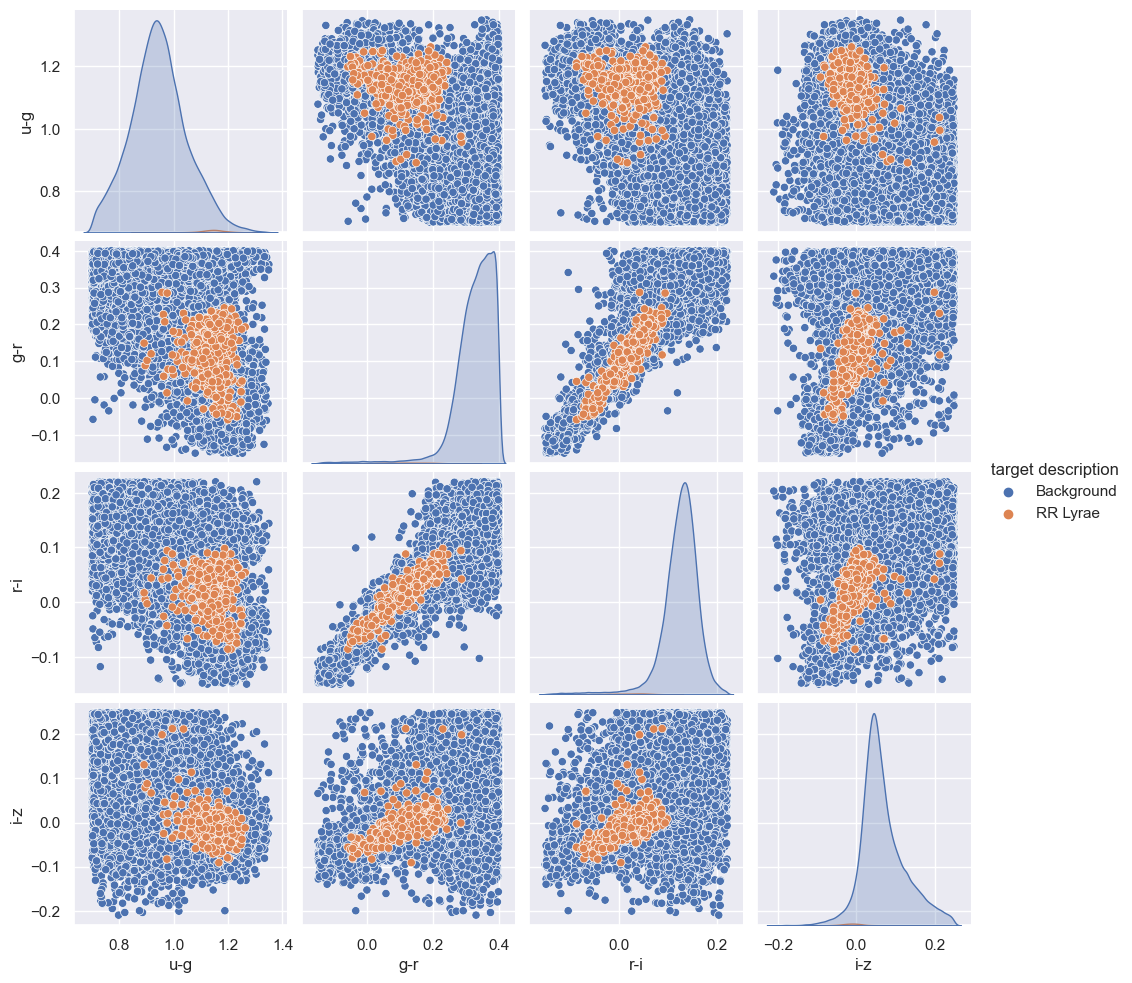

In [50]:
sns.pairplot(X_pd_all, hue = 'target description', vars = cols)

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [52]:
ind = 0
col=cols[ind]
col

'u-g'

In [53]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1,1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1,1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

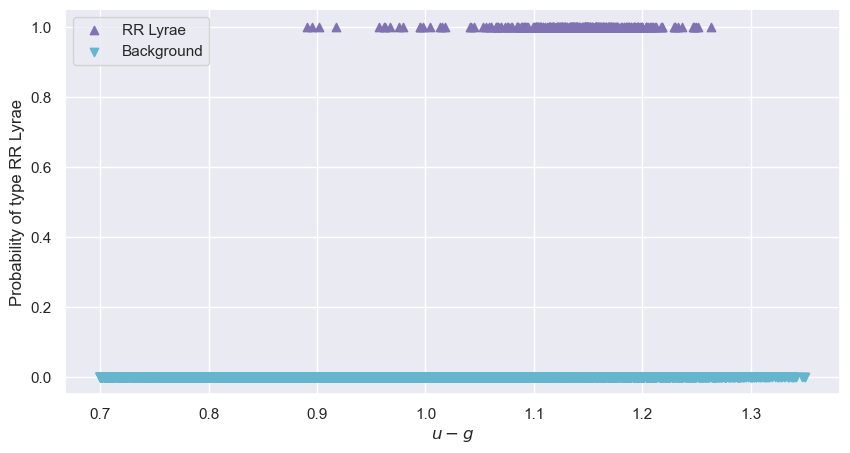

In [54]:
def plot_scatter():
    plt.figure(figsize=(10,5))
    plt.scatter(X_train_1d[y_train==1], y_train[y_train==1], c='m', marker='^', label='RR Lyrae')
    plt.scatter(X_train_1d[y_train==0], y_train[y_train==0], c='c', marker='v', label='Background')
    plt.xlabel('$' + col + '$')
    plt.ylabel('Probability of type RR Lyrae')
plot_scatter()    
plt.legend()

*Given the plot shown above, comment on how well you expect logistic regression to perform.*

From the plot, we find the majority of RR Lyraes are clustered in the interval (1.05, 1.2) but Backgrounds are also clustered there, which means we could not easily classify them by setting boundaries. Therefore, logistic regression will not have a good performance here.

*Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.*

In [55]:
decision_boundary_guess = 1.1

In [56]:
check_var_defined('decision_boundary_guess')
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.1000


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [57]:
C = 1e10

*Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.*

In [58]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(C = C)
clf.fit(X_train_1d, y_train)

LogisticRegression(C=10000000000.0)

In [59]:
check_var_defined('clf')

clf defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.*

(Ensure your result is a scalar and not an array of length 1.)

In [60]:
intp = clf.intercept_[0]
co = clf.coef_[0][0]
decision_boundary_sklearn = -intp/co

In [61]:
check_var_defined('decision_boundary_sklearn')
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn defined.
decision_boundary_sklearn = 1.3719


*Evaluate the probabilities predicted by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.*

In [62]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
y_1d_proba = clf.predict_proba(X_1d_new)

In [63]:
check_var_defined('y_1d_proba')

y_1d_proba defined.


*Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.*

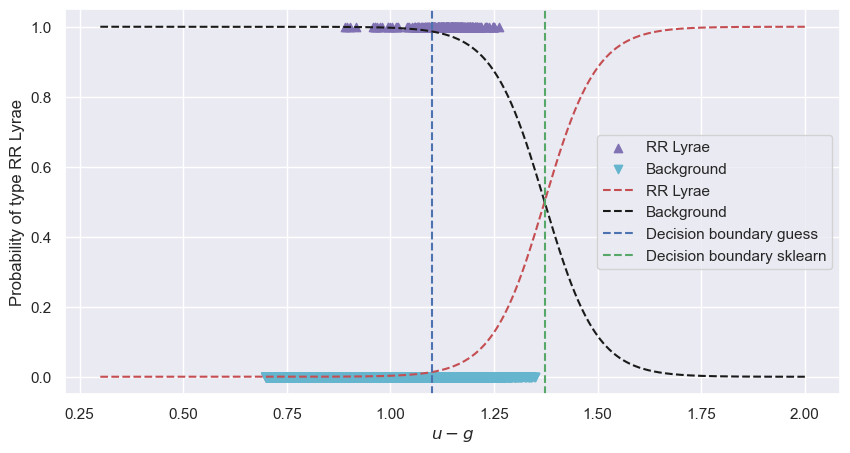

In [64]:
plot_scatter()
plt.plot(X_1d_new, y_1d_proba[:, 1], "r--", label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba[:, 0], "k--", label="Background")
plt.axvline(x = decision_boundary_guess, c='b', ls='--', label='Decision boundary guess')
plt.axvline(x = decision_boundary_sklearn,c='g', ls='--', label='Decision boundary sklearn')
plt.legend()
plt.show()

*From inspection of your plot, how would all objects in the training set be classified?*

Almost all of the instances would be classified as Background because all the values are less than decision boundary sklearn which is 1.3719.

*Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. User variable `y_test_1d_pred` to specify your answer.*

In [65]:
y_test_1d_pred = clf.predict(X_test_1d)

In [66]:
check_var_defined('y_test_1d_pred')

y_test_1d_pred defined.


*How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.*

In [67]:
n_rrlyrae_pred = int(np.sum(y_test_1d_pred))

In [68]:
check_var_defined('n_rrlyrae_pred')
assert n_rrlyrae_pred % 1 == 0 # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


*How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.*

In [69]:
n_background_pred = len(y_test_1d_pred) - n_rrlyrae_pred

In [70]:
check_var_defined('n_background_pred')
assert n_background_pred % 1 == 0 # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

*First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

(You may drop $i$ superscripts for notational brevity.)

Firstly,
$$ \log(\hat{p}) = \log(\frac{1}{1+\exp{(-\theta^\text{T} x)}})= -\log(1+\exp{(-\theta^\text{T} x)})$$
Then,
$$ \log(1-\hat{p}) = \log(1-\frac{1}{1+\exp{(-\theta^\text{T} x)}}) = \log(\frac{\exp{(-\theta^\text{T} x)}}{1+\exp{(-\theta^\text{T} x)}})$$
Therefore,
$$ \log(1-\hat{p}) = - \theta^\text{T} x- \log(1+\exp{(-\theta^\text{T} x)})$$

*Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

Substituted by $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$, we have
$$ C(\theta) = -\frac{1}{m}\sum_{i=1}^{m}(-y\log(1+\exp{(-\theta^\text{T} x)})+(y-1)(\theta^\text{T} x+ \log(1+\exp{(-\theta^\text{T} x)}))) $$
Then,
$$ C(\theta) = -\frac{1}{m}\sum_{i=1}^{m}(-\log(1+\exp{(-\theta^\text{T} x)})+(y-1)(\theta^\text{T} x)) = \frac{1}{m}\sum_{i=1}^{m}(\log(1+\exp{(-\theta^\text{T} x)})+(1-y)(\theta^\text{T} x))$$

*Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.*

We have,
$$ \frac{\partial C}{\partial \theta_{j}} = \frac{\partial}{\partial \theta_{j}}(\frac{1}{m}\sum_{i=1}^{m}(\log(1+\exp{(-\theta^\text{T} x)})+(1-y)(\theta^\text{T} x))) $$
And we got 4 situations for the variables, where {$ \theta^\text{T} x=1,y=0$}, {$ \theta^\text{T} x=1,y=1$}, {$ \theta^\text{T} x=0,y=0$} and {$ \theta^\text{T} x=0,y=1$}, but they have the same conclusion:
$$ \frac{\partial C}{\partial \theta_{j}} = \frac{\partial}{\partial \theta_{j}}(\frac{1}{m}\sum_{i=1}^{m}(\log(1+\exp{(\theta^\text{T} x)})-y(\theta^\text{T} x))) $$
Then,
$$\frac{\partial C}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}(\frac{x\exp{(\theta^\text{T} x)}}{1+\exp{(\theta^\text{T} x)}}-yx)=\frac{1}{m}\sum_{i=1}^{m} (\frac{1}{1+\exp{(-\theta^\text{T} x)}}-y)x = \frac{1}{m}\sum_{i=1}^{m} [\sigma(\theta^\text{T} x)-y]x $$

*Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.*

From above, we have,
$$ \frac{\partial C}{\partial \theta} = \sum_{j}\frac{\partial C}{\partial \theta_{j}}=\frac{1}{m}\sum_{i}\sum_{j} [\sigma(\theta^\text{T}_{j} x_{j}^{i})-y^{i}]x_{j}^{i}= \frac{1}{m}\sum_{i=1}^{m} [\sigma(\theta^\text{T} x^{i})-y^{i}]x^{i} = \frac{1}{m} X^{\rm T}[\sigma\left(X \theta \right) - y]$$

Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

*First, define the sigmoid function.*

In [71]:
def sigmoid(x):
    sigm = 1/(1+np.exp(-x))
    return sigm

In [72]:
assert np.isclose(sigmoid(0), 0.5)

*Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.*

In [73]:
X_train_1d_b = np.insert(X_train_1d, 0, values=1, axis=1)

In [74]:
check_var_defined('X_train_1d_b')

X_train_1d_b defined.


*Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 40000` iterations and a learning rate of `alpha = 10.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.*

In [75]:
n_iterations = 40000
alpha = 10.0
theta = np.array([[1], [1]])
m = len(X_train_1d_b)
for i in range(n_iterations):
    grad = X_train_1d_b.T @ (sigmoid(theta.T @ X_train_1d_b.T) - y_train).T / m
    theta = theta - alpha * grad

In [76]:
check_var_defined('theta')
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8176


*Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.*

In [77]:
intercept_diff = theta[0][0] - clf.intercept_[0]

In [78]:
check_var_defined('intercept_diff')
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = 1.0836E-03


*Compute the difference between the logistic regression model* slope *(i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.*

In [79]:
coeff_diff = clf.coef_[0][0] - theta[1][0]

In [80]:
check_var_defined('coeff_diff')
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = 9.5557E-04


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  *Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.*

The class imbalance problem means large sample sizes for some labels and small sample sizes for others where the distribution of instances of the dataset is not balanced. In the above problem, instances of Background are much more than RR Lyrae, and their distributions are overlapped, which resulted in us hard to set a decision boundary to classify them.

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

*Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.*

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [81]:
clf_balanced = linear_model.LogisticRegression(C = C, class_weight='balanced')
clf_balanced.fit(X_train_1d, y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

In [82]:
check_var_defined('clf_balanced')

clf_balanced defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.* 

(Ensure your result is a scalar and not an array of length 1.)

In [83]:
int = clf_balanced.intercept_[0]
coe = clf_balanced.coef_[0][0]
decision_boundary_sklearn_balanced  = -int/coe

In [84]:
check_var_defined('decision_boundary_sklearn_balanced')
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print("decision_boundary_sklearn_balanced = {0:.4f}".format(decision_boundary_sklearn_balanced))

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0597


*Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.*

In [85]:
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [86]:
check_var_defined('y_1d_proba_balanced')

y_1d_proba_balanced defined.


*For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.*

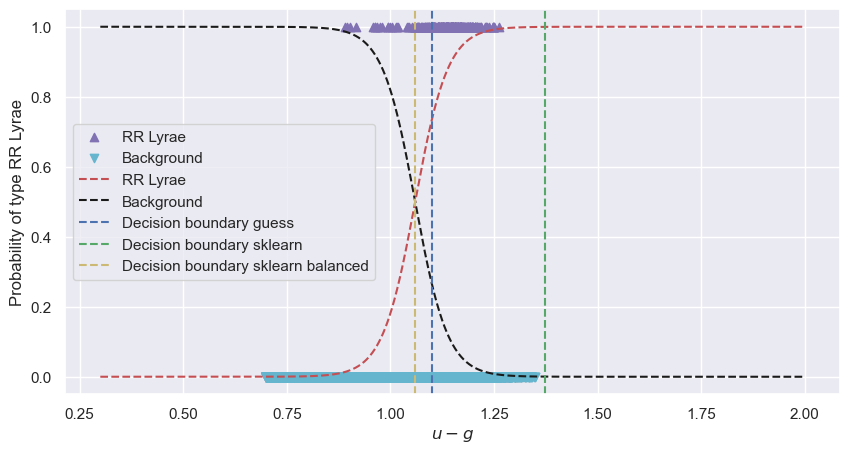

In [87]:
plot_scatter()
plt.plot(X_1d_new, y_1d_proba_balanced[:, 1], "r--", label="RR Lyrae")
plt.plot(X_1d_new, y_1d_proba_balanced[:, 0], "k--", label="Background")
plt.axvline(x = decision_boundary_guess, c='b', ls='--', label='Decision boundary guess')
plt.axvline(x = decision_boundary_sklearn,c='g', ls='--', label='Decision boundary sklearn')
plt.axvline(x = decision_boundary_sklearn_balanced,c='y', ls='--', label='Decision boundary sklearn balanced')
plt.legend()
plt.show()

*Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.*

The decision boundary of the balanced model has better performance, which can broadly classify the train set.

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [88]:
ind = 1
cols[:ind+1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [89]:
X_train_2d = X_train[:, :ind+1]
X_train_2d = X_train_2d.reshape(-1,ind+1)
X_test_2d = X_test[:, :ind+1]
X_test_2d = X_test_2d.reshape(-1,ind+1)

*Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.*

In [90]:
clf_2d_logistic = linear_model.LogisticRegression(C = C, class_weight='balanced')
clf_2d_logistic.fit(X_train_2d, y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

In [91]:
check_var_defined('clf_2d_logistic')

clf_2d_logistic defined.


*Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.*

In [92]:
y_2d_pred = clf_2d_logistic.predict(X_train_2d)
from sklearn.metrics import confusion_matrix

y_2d_mat = confusion_matrix(y_train, y_2d_pred)
TN, FN = y_2d_mat[0,0], y_2d_mat[1,0]
FP, TP = y_2d_mat[0,1], y_2d_mat[1,1]
precision_logistic, recall_logistic = TP / (TP + FP), TP / (TP + FN)

In [93]:
check_var_defined('precision_logistic')
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.141589


In [94]:
check_var_defined('recall_logistic')
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.985955


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [95]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4) # g-r
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

*Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

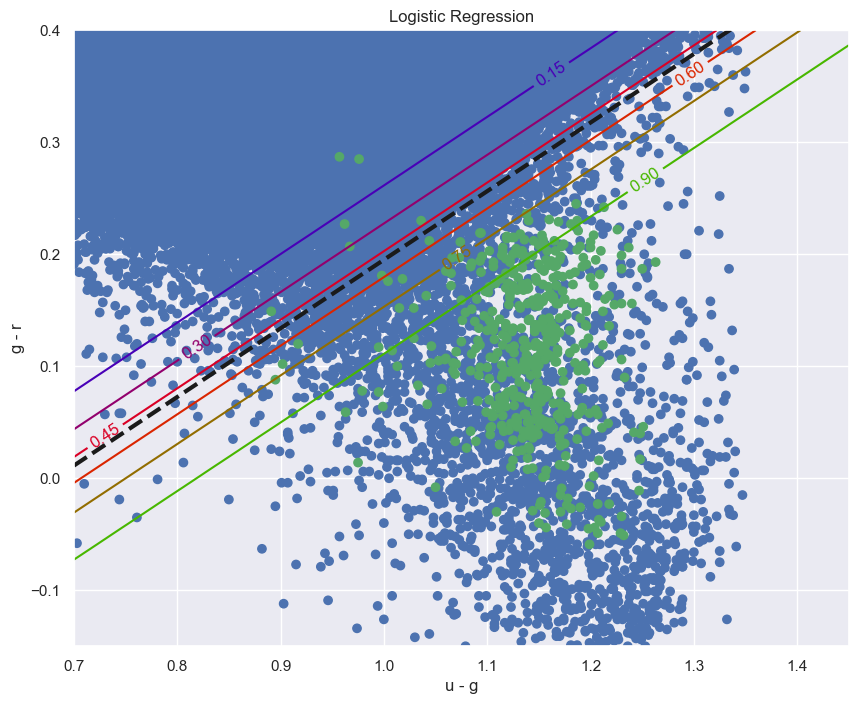

In [96]:
index_0, index_1 = np.where(y == 0.)[0], np.where(y == 1.)[0]
cols = np.array(['1']).repeat(len(y))
cols[index_0],  cols[index_1]= 'bs', 'g'
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cols)
x1, y1 = xx.flatten(), yy.flatten()
x_2d_sam = np.c_[x1, y1]
y_2d_prob = clf_2d_logistic.predict_proba(x_2d_sam)
zz = y_2d_prob[:, 1].reshape(xx.shape)
contour = plt.contour(xx, yy, zz, cmap=plt.cm.brg)
left_right = np.array([0.7, 1.45]) 
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.title("Logistic Regression")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.axis([0.7, 1.45, -0.15, 0.4])
plt.show()

*Now train an SVM classifier that can support a non-linear decision boundary on the same problem.*

In [97]:
from sklearn.svm import SVC

SVM = SVC(class_weight='balanced')
SVM.fit(X_train_2d, y_train)

SVC(class_weight='balanced')

*Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

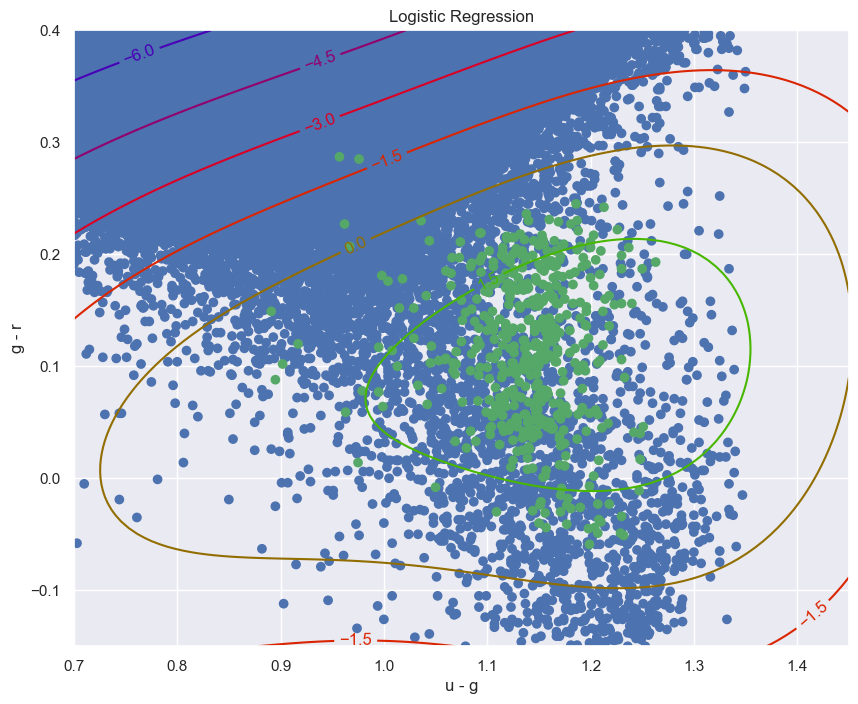

In [98]:
index_0, index_1 = np.where(y == 0.)[0], np.where(y == 1.)[0]
cols = np.array(['1']).repeat(len(y))
cols[index_0],  cols[index_1]= 'bs', 'g'
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=cols)
x1, y1 = xx.flatten(), yy.flatten()
x_2d_sam = np.c_[x1, y1]
y_2d_pro = SVM.decision_function(x_2d_sam)
contour = plt.contour(xx, yy, y_2d_pro.reshape(100, 100), cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.title("Logistic Regression")
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.axis([0.7, 1.45, -0.15, 0.4])
plt.show()

*Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.*

In [99]:
y_2d_pred1 = SVM.predict(X_train_2d)
y_2d_mat1 = confusion_matrix(y_train, y_2d_pred1)
TN, FN = y_2d_mat1[0,0], y_2d_mat1[1,0]
FP, TP = y_2d_mat1[0,1], y_2d_mat1[1,1]
precision_svm, recall_svm = TP / (TP + FP), TP / (TP + FN)

In [100]:
check_var_defined('precision_svm')
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.136328


In [101]:
check_var_defined('recall_svm')
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 0.988764


*Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.*

The decision boundary of logistic regression is just linear but SVM models are circles that have high dimensions. Therefore, SVM models can classify data for more complex situations, which is also proved by lower precision but higher recall.